In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


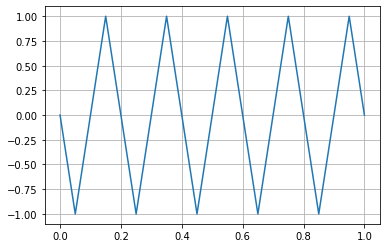

In [11]:
Δd = 0.1
l = 1
ns = 10
p = np.arange(ns+2, dtype=np.float) 
p2 = np.power((-1),p)
p[0]=.5
p2[0]=0
p[-1]=10.5
p2[-1]=0

p-=0.5
p/=ns
plot(p,p2)
p

grid()

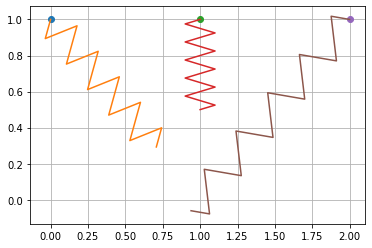

In [46]:
RotY = lambda θ: [[cos(θ), sin(θ)], 
         [-sin(θ), cos(θ)]]

def spring(x,z, θ, l, ns=10, width = 0.2):
   
    
    px = np.arange(ns+2, dtype=np.float) 
    pz = np.power((-1),px) * width / 2
    px[0] = .5
    pz[0] = 0
    px[-1] = 10.5
    pz[-1] = 0

    px -= 0.5
    px /= ns  # between zero and one
    px *= l  # extend or compress to lenght l
    
    # Rotation
    R = RotY(θ + pi/2)
    points = array([np.dot(R, [pxi, pzi]) for pxi,pzi in zip(px, pz)])
    px, pz = points[:,0], points[:,1]
    
    # Translation
    px+=x
    pz+=z
    
    return px, pz


def draw_spring(x,z, θ, l, ax=plt):
    px, pz = spring(x,z, θ, l)
    ax.plot(px[0], pz[0], 'o')
    ax.plot(px, pz)
    

draw_spring(0,1, -pi/4,1)
draw_spring(1,1, 0,.5)
draw_spring(2,1, pi/4,1.5)
grid()

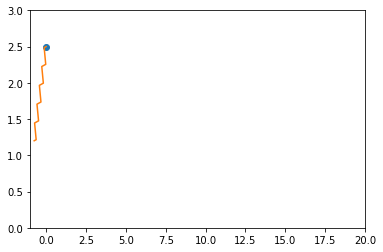

In [66]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()


def animate(t):
    ax.clear()
    ax.set_xlim(-1,20)
    ax.set_ylim(0,3)
   
    x = .1*t
    z = cos(.1*t)  + 1.5
    θ = pi/6*cos(.1*t)
    l = 1+ 0.5* cos(.1*t)
    draw_spring(x,z, θ, l)
        

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
#HTML(anim.to_jshtml())